# Linear Regresion Assignment 
### Bike Sharing Assignment

### Approach

- Step 1 - Importing all required libraries
- Step 2 - Reading and Understanding the data
- Step 3 - Visualising the data
- Step 4 - Data Preparation
- Step 5 - Splitting the Data into Training and Testing Sets
- Step 6 - Model Building
- Step 7 - Residual Analysis
- Step 8 - Making Predictions using final model
- Step 9 - Model Evaluation
- Interpreting Results

<h2>Step 1 - <b>Importing all required libraries</b></h2>

In [99]:
# changing the working directory to location where the file is stored
import os
os.chdir('C:\\Users\\91703/Downloads')

In [100]:
# filtering unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [101]:
# importing all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
#for not truncating number of columns displayed while displaying a dataframe
pd.set_option('max_columns', None)

<h2>Step 2 - <b>Reading and Understanding the data</b></h2>

In [103]:
# importing the dataset
bikesharing_df = pd.read_csv('day.csv')
bikesharing_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [104]:
bikesharing_df.sample(10) # looking at random rows

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
317,318,14-11-2018,4,0,11,0,3,1,1,21.730000,26.23060,58.7083,20.541932,595,3891,4486
342,343,09-12-2018,4,0,12,0,0,0,1,11.924153,15.87710,69.5833,5.542019,261,3359,3620
498,499,14-05-2019,2,1,5,0,2,1,2,23.506653,27.49500,78.9583,14.250364,342,2501,2843
562,563,17-07-2019,3,1,7,0,3,1,1,33.551653,37.78415,50.5833,7.666743,921,5865,6786
40,41,10-02-2018,1,0,2,0,6,0,1,5.918268,7.47740,43.7391,14.869645,47,1491,1538
393,394,29-01-2019,1,1,1,0,2,1,1,11.582500,13.63605,31.1250,16.083350,558,2685,3243
291,292,19-10-2018,4,0,10,0,5,1,3,22.211299,25.69240,89.5217,16.303713,254,2170,2424
658,659,21-10-2019,4,1,10,0,1,1,1,19.030847,22.82145,51.0000,11.125618,2132,4692,6824
339,340,06-12-2018,4,0,12,0,4,1,3,18.962500,22.82000,94.9583,15.583061,126,2468,2594
74,75,16-03-2018,1,0,3,0,5,1,2,14.973897,18.34650,77.6522,13.608839,321,1871,2192


In [105]:
bikesharing_df.shape

(730, 16)

In [106]:
bikesharing_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [107]:
bikesharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Inference<hr>
* We have no null values in any column 
* Also we have 4 variables `season`, `weathersit`, `weekday` and `mnth` which are actually categorical
* We have other binary variables which need no conversion as they are of numeric type as needed for building model

In [108]:
bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###### Changing numeric variables which are actually categorical to categorical type by replacing each value to its corresponding category


In [109]:
# season
bikesharing_df['season'] = bikesharing_df.season.replace([1,2,3,4],['spring','summer','fall','winter']) 
# changing each numeric value to its corresponding season value

In [110]:
bikesharing_df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [111]:
# weathersit
bikesharing_df['weathersit'] = bikesharing_df.weathersit.replace([1,2,3,4],['Clear, Partly cloudy','Mist + Cloudy','Light Snow/Rain + Thunderstorm + Scattered clouds','Heavy Rain + Ice Pallets + Thunderstorm'])             

In [112]:
bikesharing_df.weathersit.value_counts()

Clear, Partly cloudy                                 463
Mist + Cloudy                                        246
Light Snow/Rain + Thunderstorm + Scattered clouds     21
Name: weathersit, dtype: int64

In [113]:
# weekday
bikesharing_df['weekday'] = bikesharing_df.weekday.replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})   

In [114]:
bikesharing_df.weekday.value_counts()

Tuesday      105
Monday       105
Thursday     104
Wednesday    104
Sunday       104
Saturday     104
Friday       104
Name: weekday, dtype: int64

In [115]:
bikesharing_df['mnth'] = bikesharing_df.mnth.replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 
                                            7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [116]:
bikesharing_df.mnth.value_counts()

mar    62
oct    62
jan    62
may    62
aug    62
jul    62
dec    62
apr    60
jun    60
nov    60
sep    60
feb    56
Name: mnth, dtype: int64

#### <b><i>Dropping redundant variables</i></b><hr>

* As given in the data dictionary `instant` column is an index column 
* `dteday` column gives the date of corresponding record but we also have 'yr' columns which describes if the year is 2018 or 2019 and `mnth` column which has the mnth of corresponding record
* so we can drop `instant` and `dteday` columns as they dont add any extra info to the data and are redundant
<br><br>
* Also cnt = casual + registered so all points in `cnt` variable will be described by `casual` and `registered`
* So we can drop both `casual` and `registered`

In [117]:
# dropping redundant variables
bikesharing_df.drop(['instant','dteday','casual','registered'], inplace= True, axis = 1)

In [118]:
bikesharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wednesday,1,"Clear, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thursday,1,"Clear, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Friday,1,"Clear, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


In [119]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [120]:
bikesharing_df.corr() # looking at correlation matrix

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


<h2>Step 3 - <b>Visualising the data</b></h2>

###### Plotting scatterplots to visualize data distribution

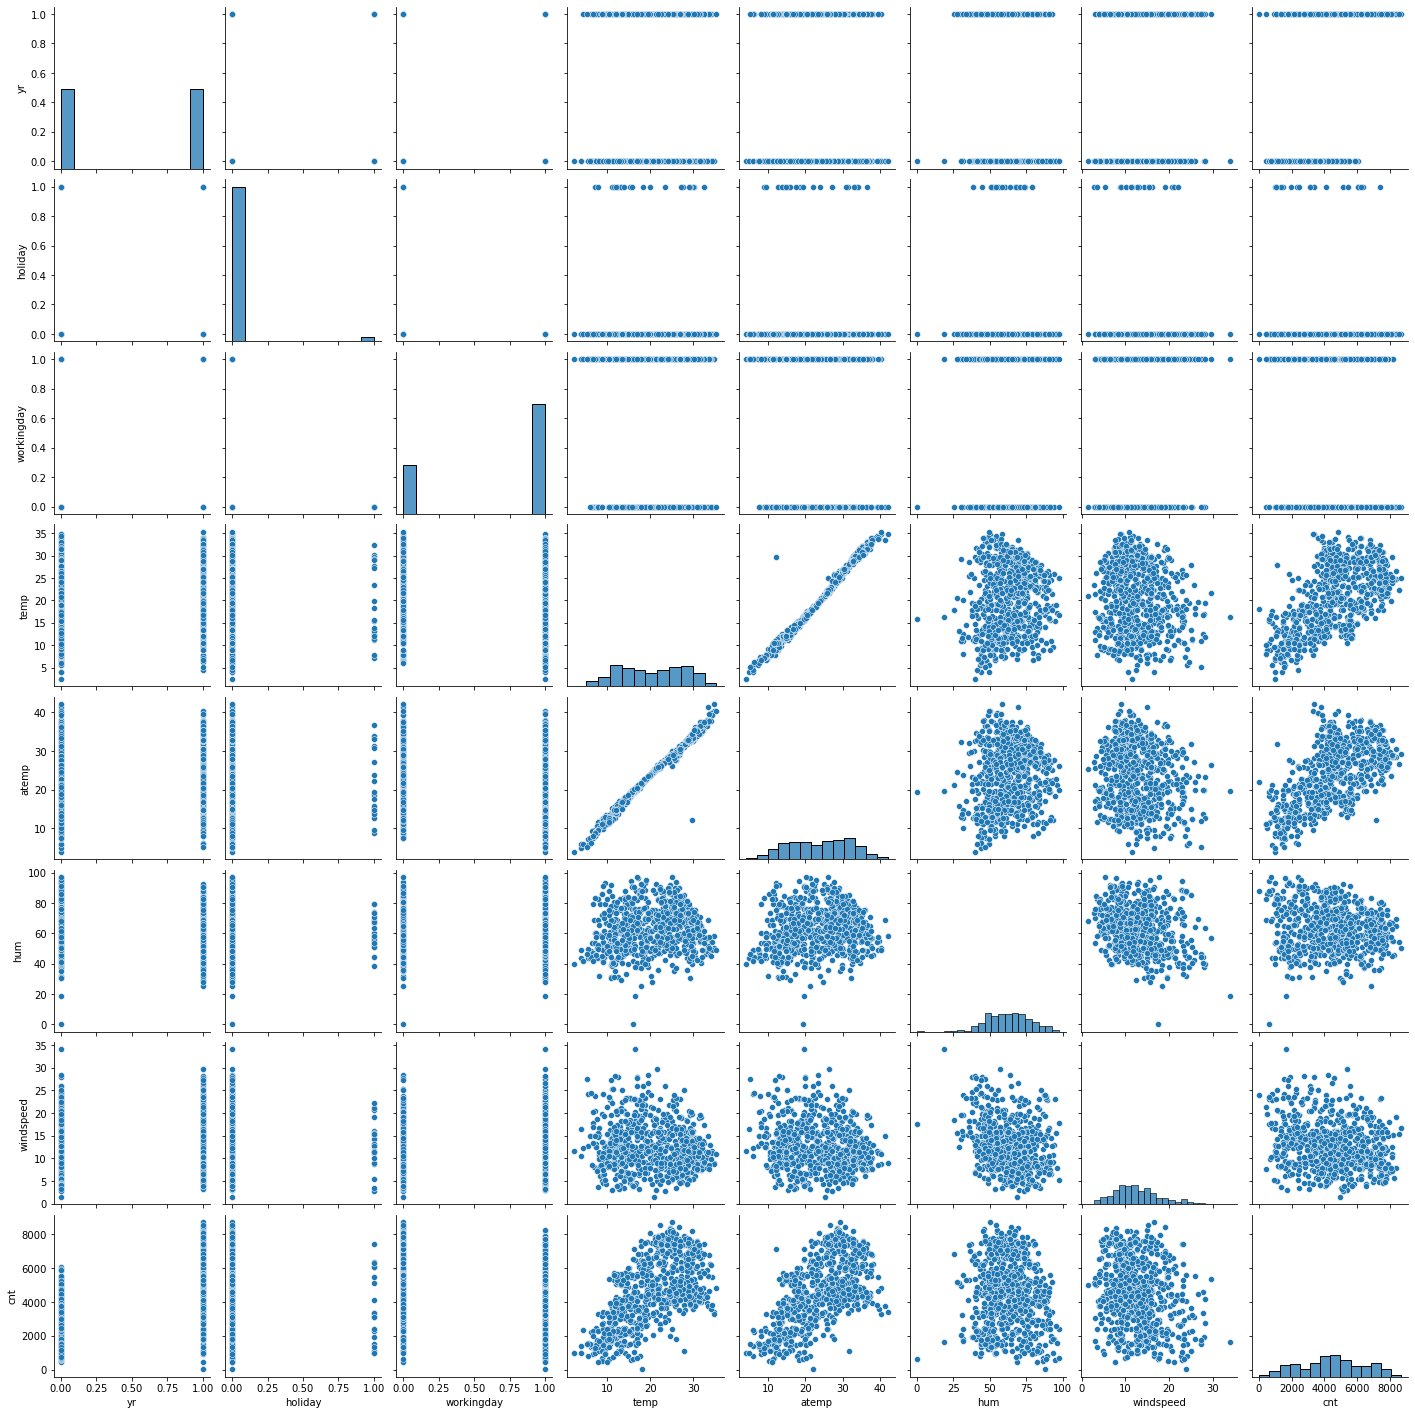

In [121]:
sns.pairplot(bikesharing_df)
plt.show()

###### plotting scatterplots of only non-binary numeric variables

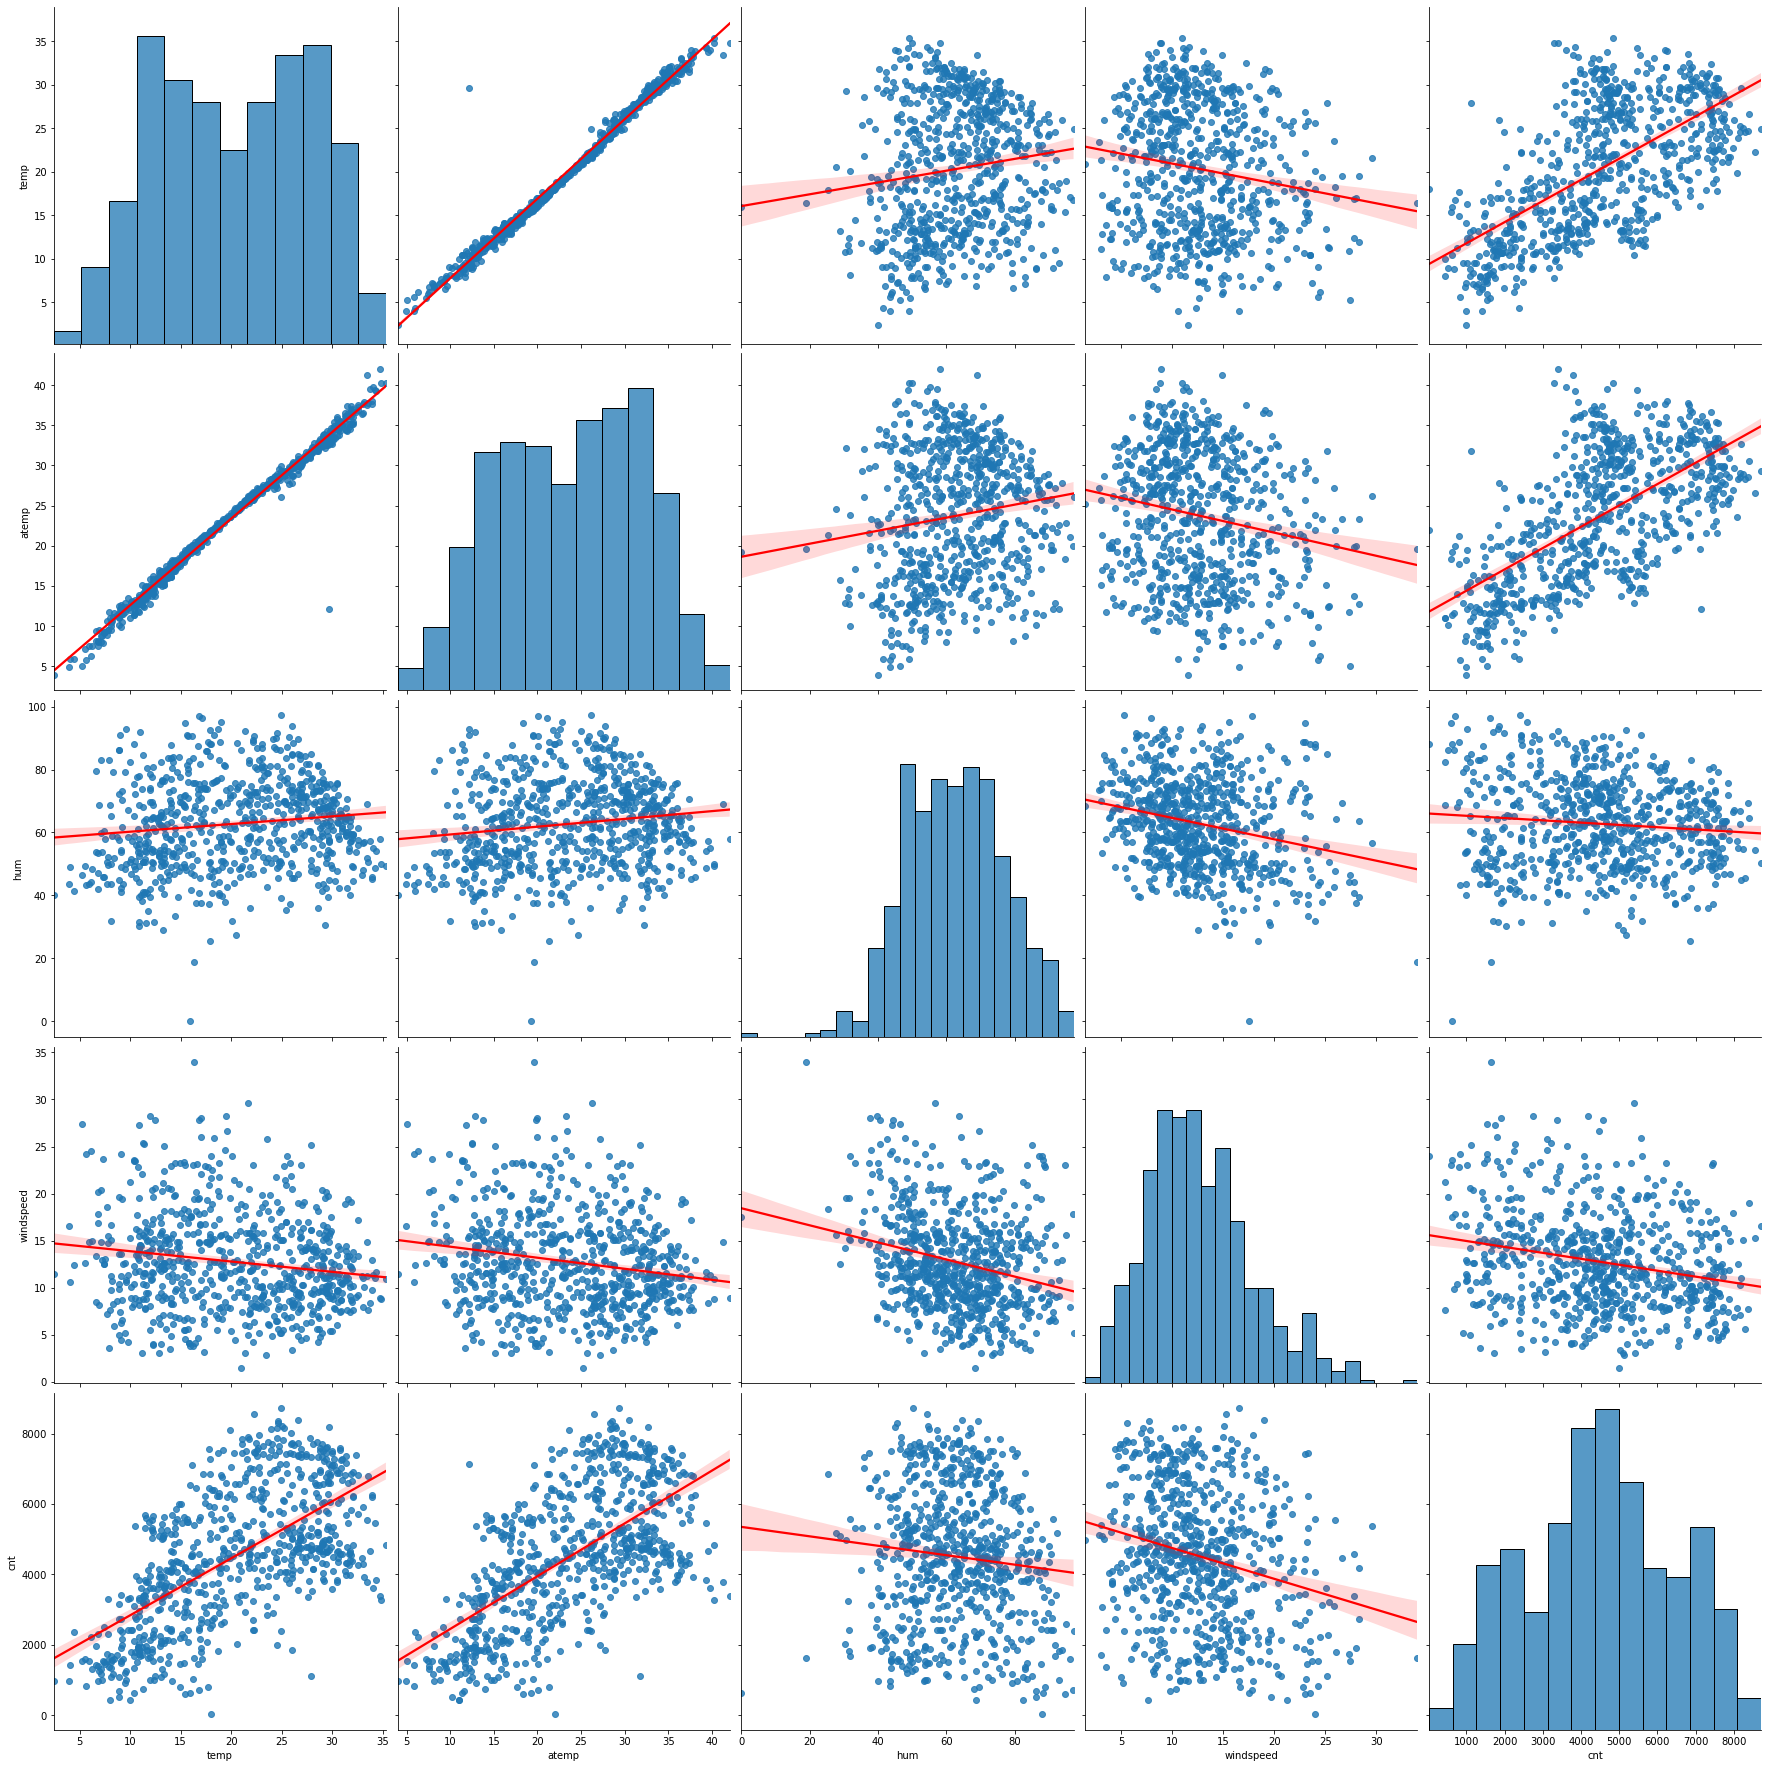

In [122]:
sns.pairplot(bikesharing_df[['temp','atemp','hum','windspeed','cnt']],height=5, aspect=1, palette='flare', kind = 'reg' ,plot_kws={'line_kws':{'color':'r'}})     
plt.show()

###### Plotting heatmap

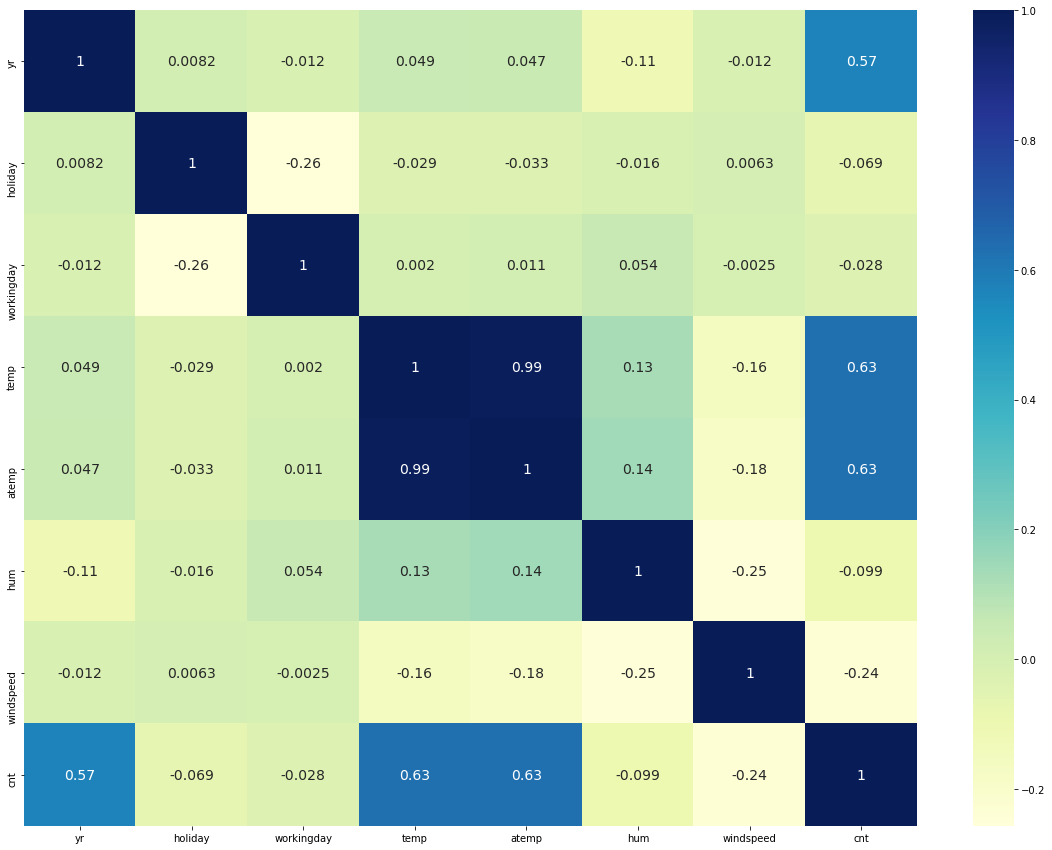

In [123]:
plt.figure(figsize = [20,15])
sns.heatmap(bikesharing_df.corr(), annot = True, cmap = 'YlGnBu', annot_kws={"size": 14})
plt.show()

## Inference<hr>
* `cnt` has a high positive correlation whith variables `temp` and `atemp`
* `cnt` has a moderate negative correlation with variable `windspeed`
* `temp` and `atemp` are very highly correlated with a correlation coefficient of 0.99 which is understandable as `temp` is temperature and `atemp` is feeling temperature

###### We can drop either `temp` or `atemp` but rather than dropping it right now we can drop any one while building the model depending on the p-values and variance inflation factor

###### Plotting box plots to visualize categorical variables

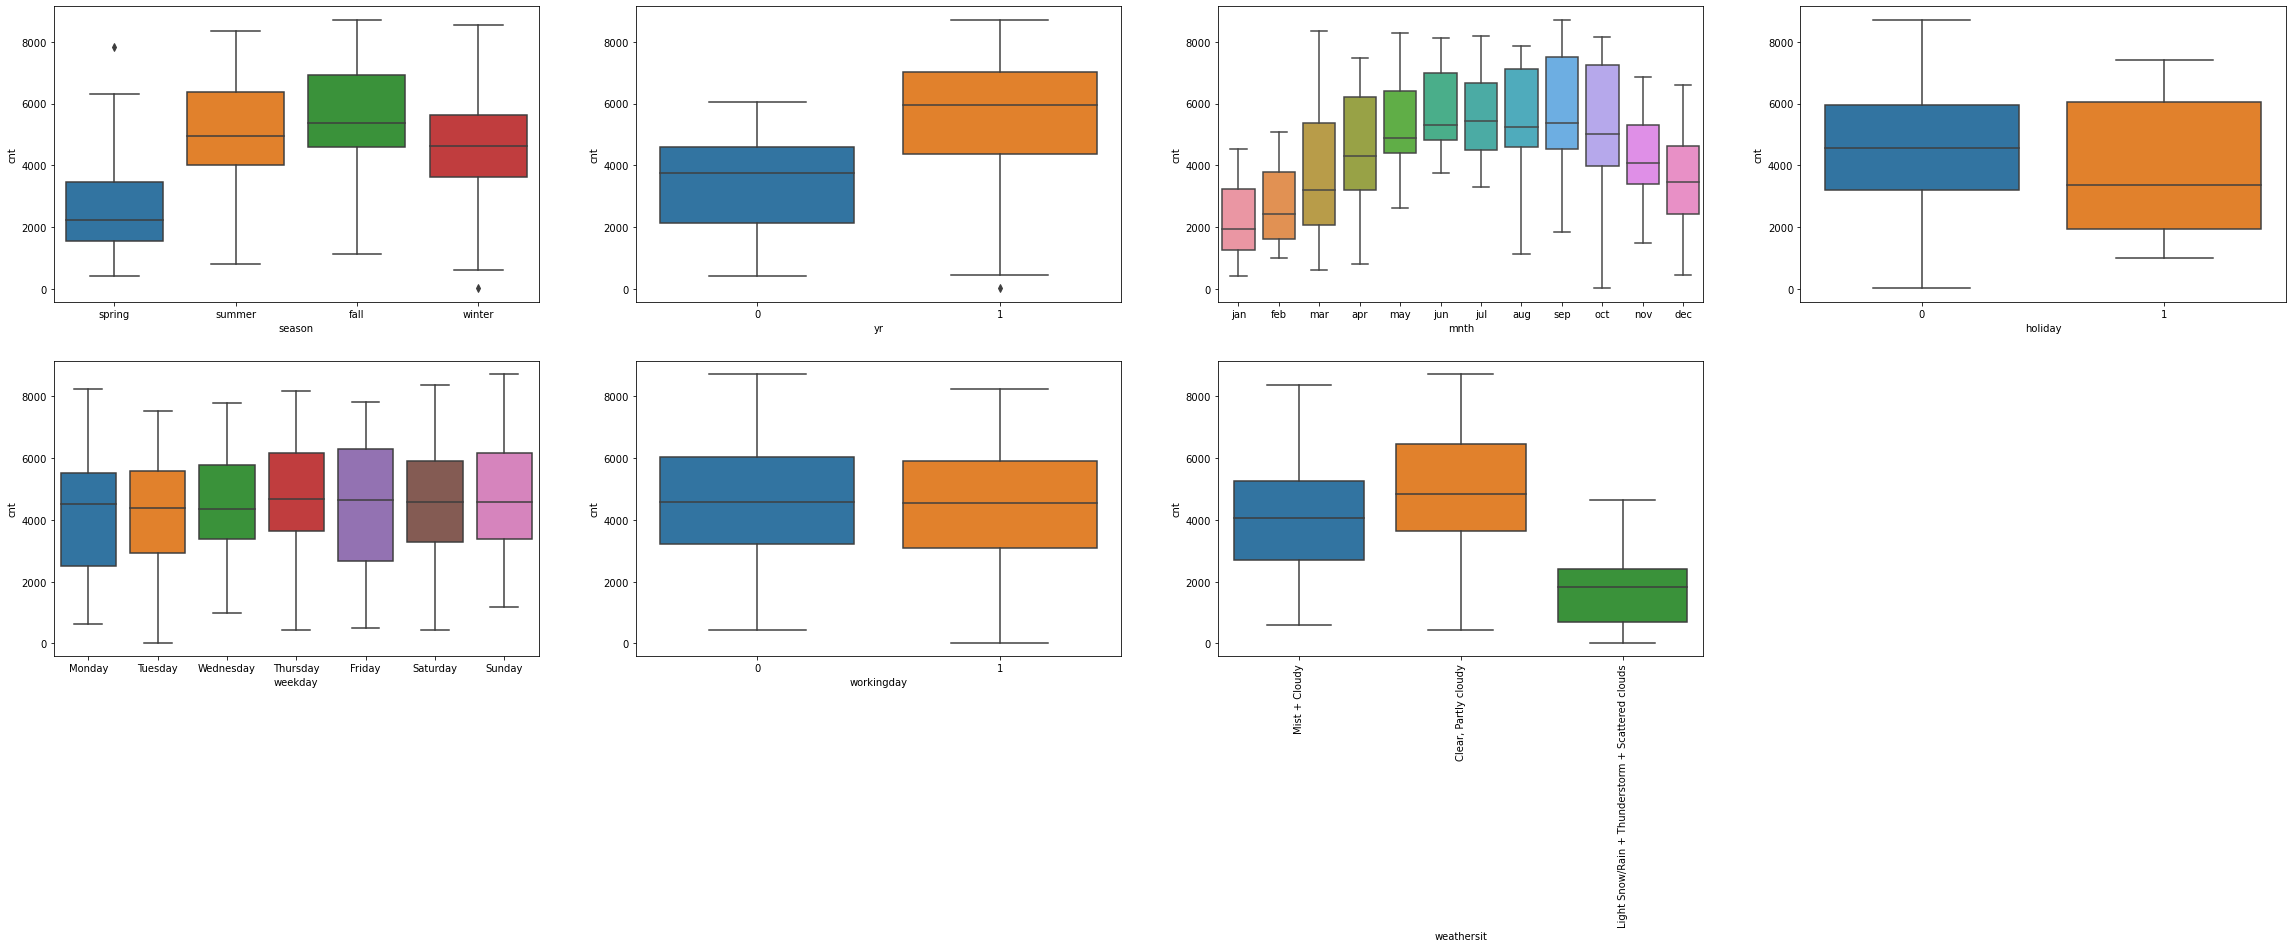

In [124]:
plt.figure(figsize = [40,25])
for i,j in zip(range(1,9),['season','yr','mnth','holiday','weekday','workingday']):  #
    plt.subplot(4,4,i)
    sns.boxplot(x = j, y = 'cnt', data = bikesharing_df)
    
plt.subplot(4,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing_df)  
plt.xticks(rotation = 90) #plotting boxplot for weathersit variable differently so to rotate xticks   
plt.show()

## Inference<hr>

* There are almost no outliers in the data
* In the months may, june, july, august and september with the median of rented bikes is the highest, which decrease from october to january and then again rise till month of may and stays about the same till september
* In the year 2019 we had more number of rented bikes than that in the year 2018
* Number of rented bikes are less in the spring season as compared to other seasons
* Number of rented bikes drops drastically when the weather is bad i.e. Light snow/rain + thunderstorm + scattered clouds

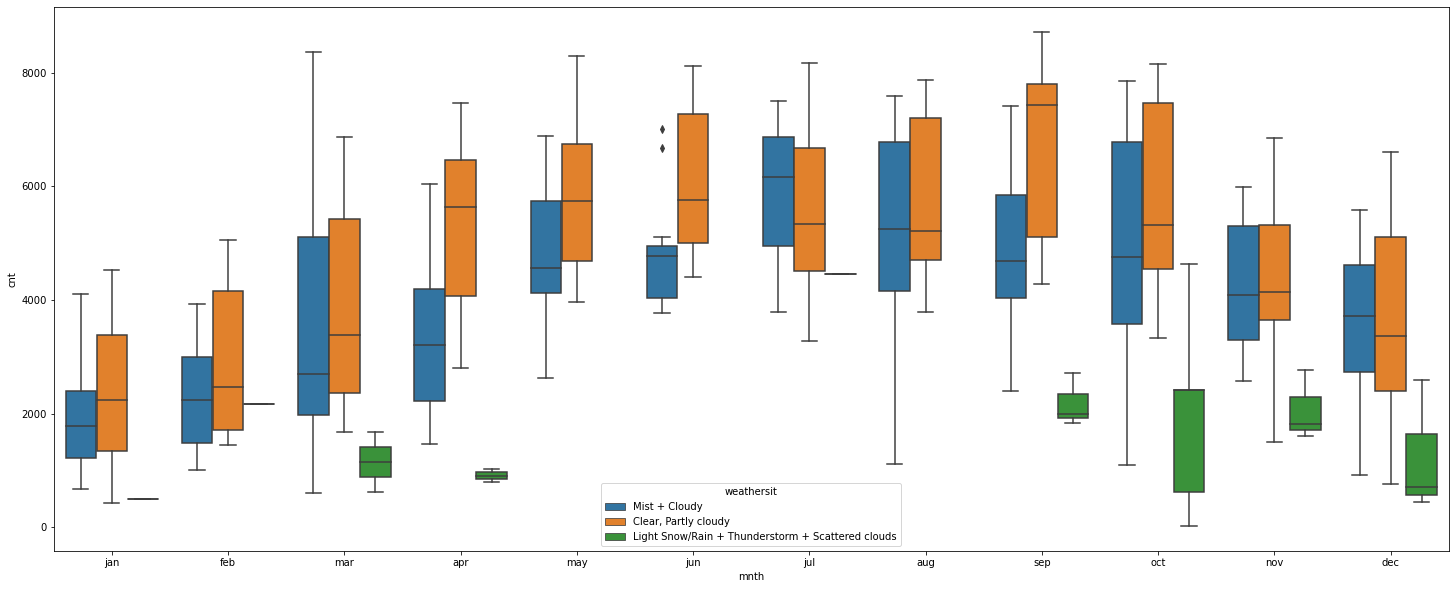

In [125]:
plt.figure(figsize = [25,10])
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing_df, hue = 'weathersit')
plt.show()

## Inference<hr>

* The demand for shared bikes is higher in the months of may, june, july, august and september as compared to other months
* When there is light snow/rain, thunderstorm and scattered clouds very few people use the service as compared to number of people using it when the weather is clear or cloudy

<h2>Step 4 - <b>Data Preparation</b></h2>

In [126]:
bikesharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wednesday,1,"Clear, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thursday,1,"Clear, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Friday,1,"Clear, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


In [127]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### <b>Creating Dummy variables</b>

In [128]:
bikesharing_df = pd.get_dummies(data = bikesharing_df, columns = ['season','mnth','weekday'], drop_first = True)  
bikesharing_df = pd.get_dummies(data = bikesharing_df, columns = ['weathersit'])  
# keepeng all 3 dummy variables of weathersit variable to not loose any information on how each weather type affects the cnt variable   

In [129]:
bikesharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Clear, Partly cloudy",weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds,weathersit_Mist + Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [130]:
bikesharing_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Clear, Partly cloudy",weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds,weathersit_Mist + Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.634247,0.028767,0.336986
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.481971,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   yr                                                            730 non-null    int64  
 1   holiday                                                       730 non-null    int64  
 2   workingday                                                    730 non-null    int64  
 3   temp                                                          730 non-null    float64
 4   atemp                                                         730 non-null    float64
 5   hum                                                           730 non-null    float64
 6   windspeed                                                     730 non-null    float64
 7   cnt                                                           730 non-n

We got 33 columns after creating dummy variables of each categorical variable
we havent changed other categorical variables with 2 values as they are in proper binary format required for model building

<h2>Step 5 - <b>Splitting the Data into Training and Testing Sets</b></h2>
  

###### train-test split

In [132]:
df_train, df_test = train_test_split(bikesharing_df, train_size = 0.7, random_state = 100)

In [133]:
print(df_train.shape, df_test.shape, sep = '\n')   # checking shapes

(510, 31)
(220, 31)


### Rescalling

In [134]:
scaler = MinMaxScaler()  # instantiating a MinMaxScaler object 

As we can see that all the variables have a relatively close ranges to each other except the cnt variable
so using MinMaxScaler we can eliminate this variations in range and normalize all the data between 0 and 1

In [135]:
# creating a list of non-binary variables in biksharing_df
L = list()
for i in bikesharing_df:
    if bikesharing_df[i].value_counts().count() > 2:
        L.append(i) 
L

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

Scaling only the non-binary variables as by scaling the binary variables we will loose their interpretability

In [136]:
# fiting/scaling the data
df_train[L] = scaler.fit_transform(df_train[L])  # learning and transforming all the non-binary vars

In [137]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Clear, Partly cloudy",weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds,weathersit_Mist + Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [138]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Clear, Partly cloudy",weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.625490,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


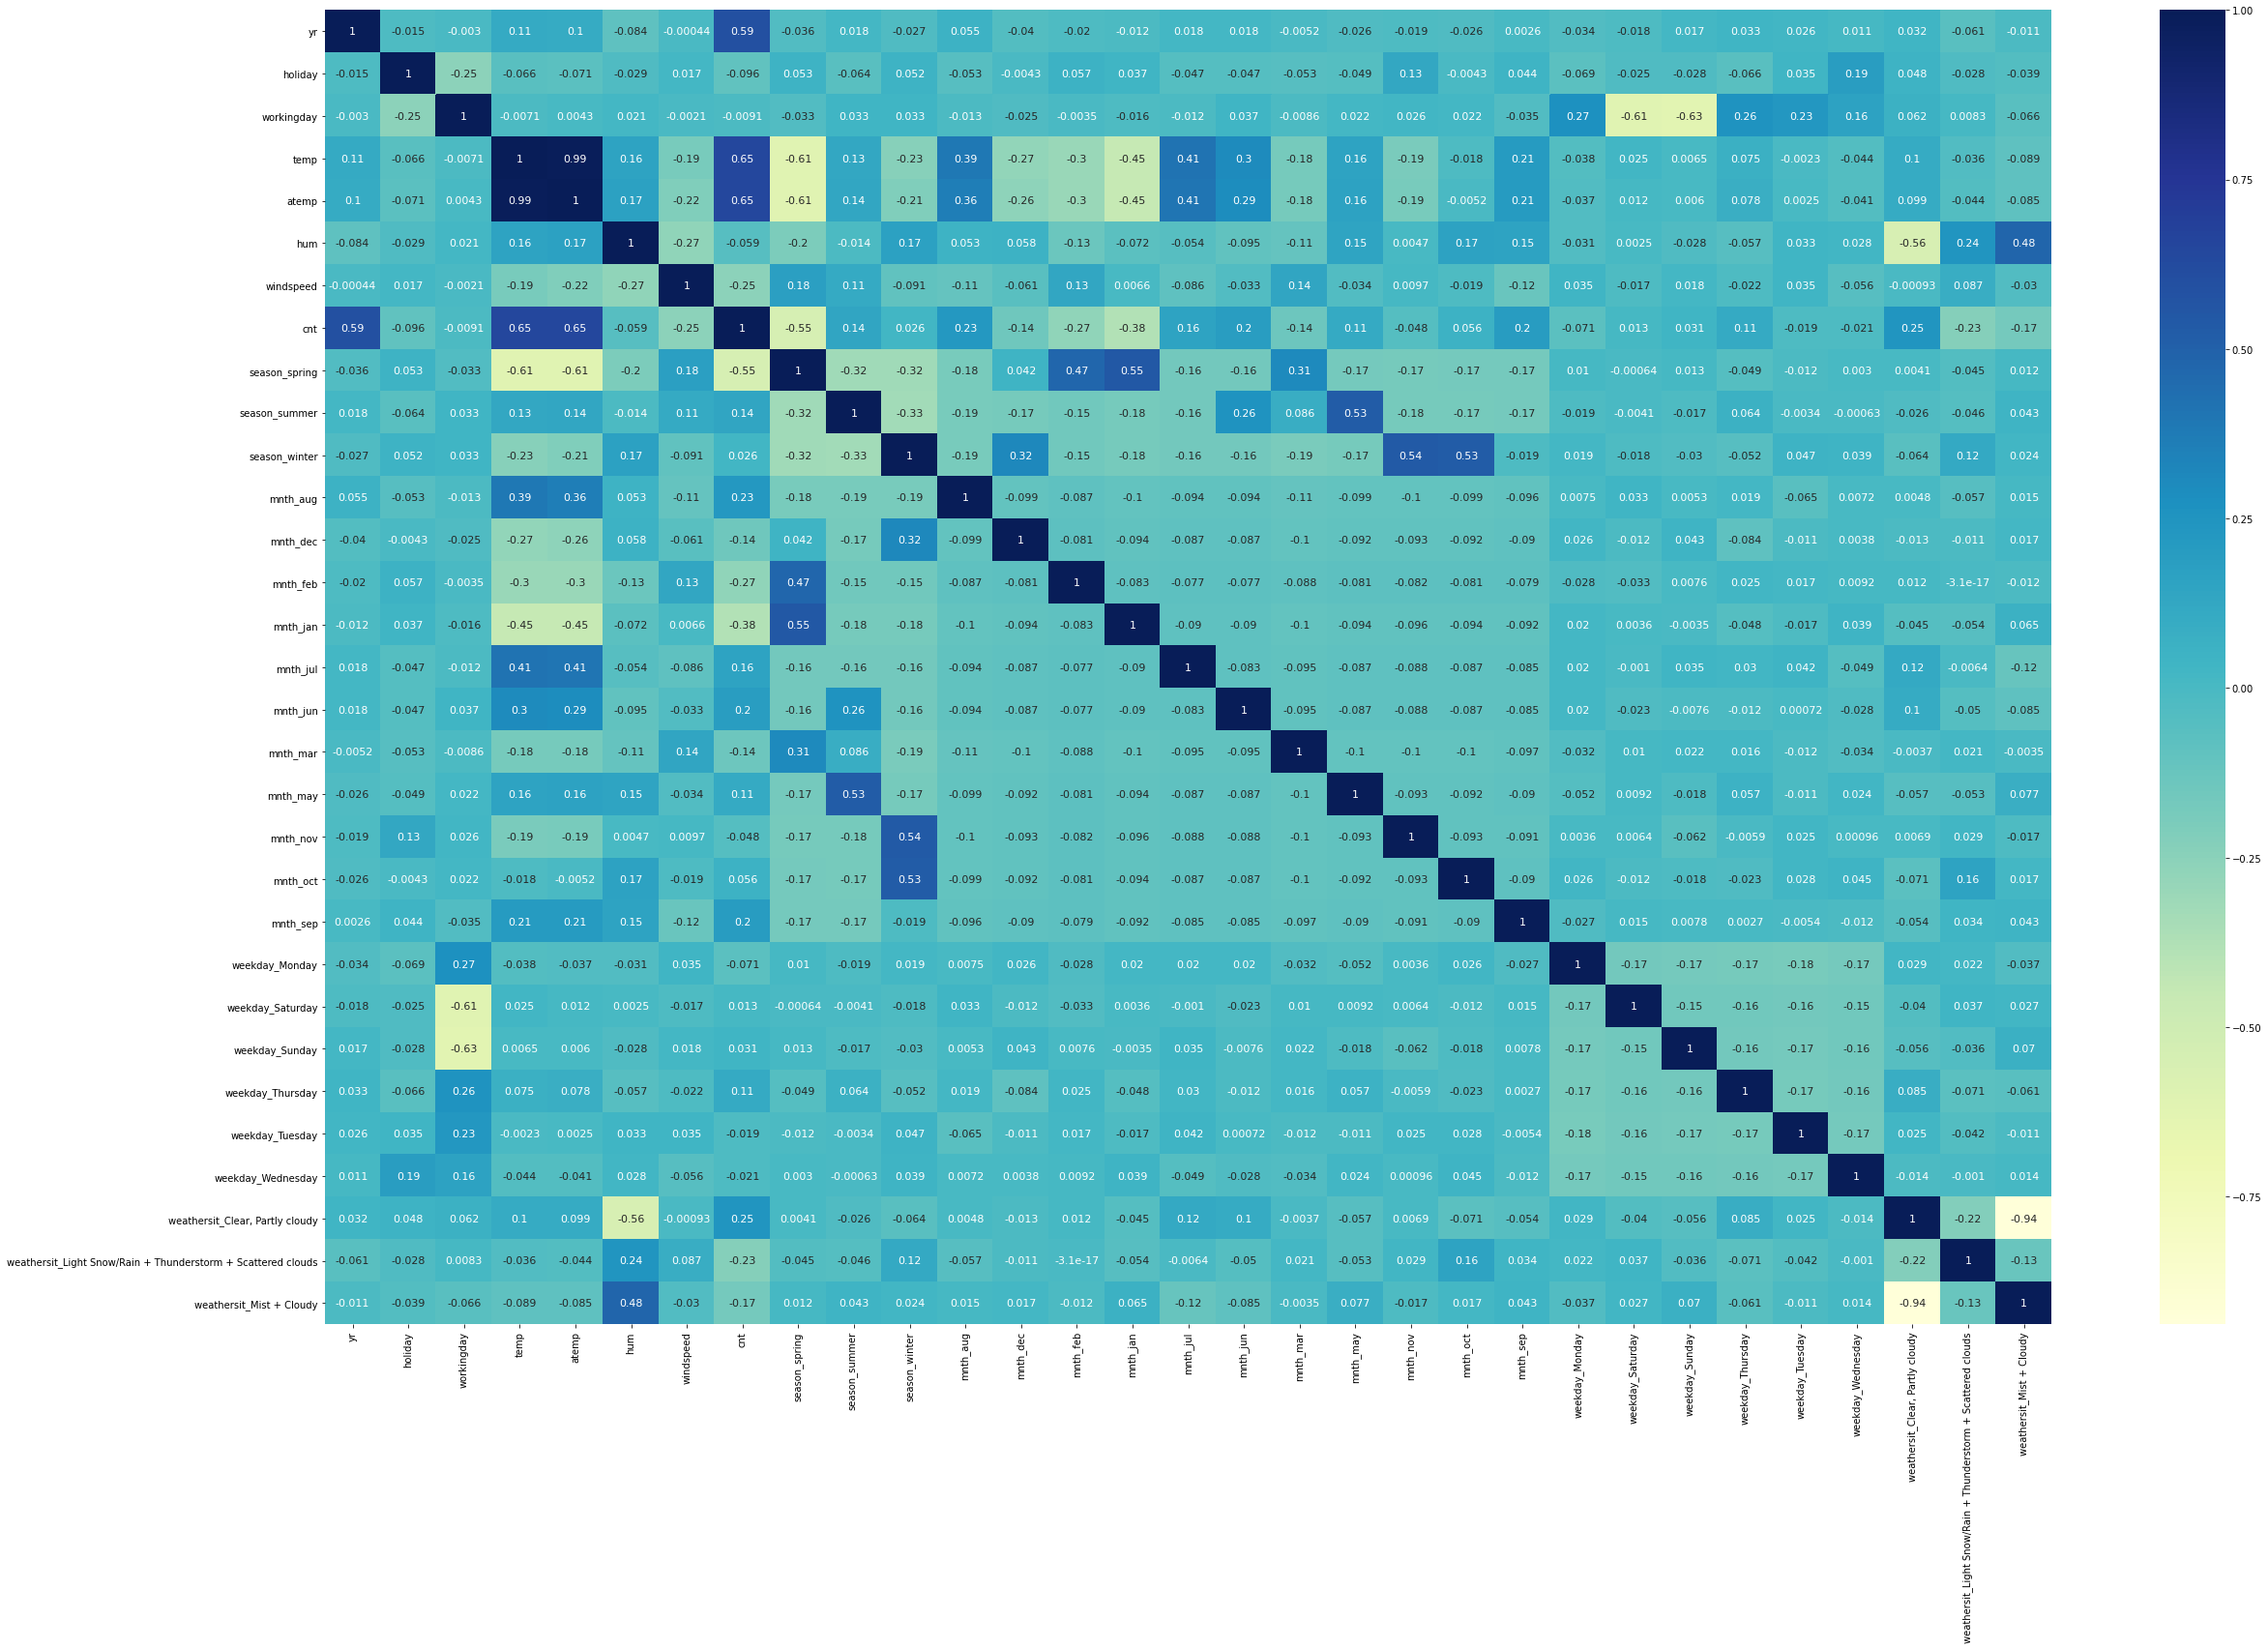

In [139]:
# Plotting a heatmap to see each correlation of each variable
plt.figure(figsize = [40, 25])
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu', annot_kws={"size": 11})
plt.show()

As we can see the `temp` and `atemp` variables have a correlation of 0.99 i.e. they are almost alike<br> 
but rather than dropping any of both we can drop them at a later stage on the basis of p-value and VIF

## Inference<hr>

* <b>Variables having a moderate to high positive correlation with `cnt` variable</b>
   
     * weathersit_Clear, Partly Cloudy
     * mnth_aug
     * atemp
     * temp
     * yr<br><br>
     
* <b>Variables having a moderate to high negative correlation with `cnt` variable</b>

     * weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds
     * mnth_jan
     * mnth_feb
     * season_spring
     * windspeed

<h2>Step 6 - <b>Model Building</b></h2>
  

In [140]:
# dividing training data into X_train and y_train variables
y_train = df_train.pop('cnt')  
X_train = df_train

In [141]:
df_train.shape

(510, 30)

In [142]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [143]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Clear, Partly cloudy",weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds,weathersit_Mist + Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


### Defining fuctions

###### Defining a function for building linear models using statsmodels library which returns model summary

In [144]:
def linear_model(X):
    X_train_lm = sm.add_constant(X)
    lr = sm.OLS(y_train, X_train_lm)
    lr_model = lr.fit()
    print(lr_model.summary())

###### Defining a function for getting VIF of each variable 

In [145]:
def VIF_calculator(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif.VIF, 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    print(vif)
# creating a dataframe consisting of variables and their corresponding VIF

#### we will be using the notation X i  for dataset of ith model </hr>
i.e. for the 1st model X1 is the corresponding dataframe, for the 5th model X5 is the corresponding dataframe etc

### model 1

###### Building the 1st model using all variables

In [146]:
X1 = X_train.copy()   # doing a deep copy of X_train df to X1 df so to create a new object 
linear_model(X1)      # and to not affect X_train due any changes in X1 dataframe 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.24e-177
Time:                        12:57:14   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [147]:
VIF_calculator(X1)

                                             features     VIF
27                    weathersit_Clear, Partly cloudy  289.67
29                           weathersit_Mist + Cloudy  164.60
3                                                temp   66.83
2                                          workingday   66.33
4                                               atemp   55.81
23                                     weekday_Sunday   38.79
22                                   weekday_Saturday   36.99
28  weathersit_Light Snow/Rain + Thunderstorm + Sc...   15.32
7                                       season_spring   10.77
9                                       season_winter    9.47
8                                       season_summer    8.29
1                                             holiday    6.80
18                                           mnth_nov    6.79
10                                           mnth_aug    6.48
19                                           mnth_oct    6.47
13      

* We can see many variables have very high p-value as well as high VIF
* as the mnth_march variable has highest p-value droping it from the model

### model 2

In [148]:
X2 = X1.drop('mnth_mar', axis = 1)  # dropping mnth_mar variable from X1 and saving new it to df X2
linear_model(X2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.53
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.24e-178
Time:                        12:57:15   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     481   BIC:                            -865.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [149]:
VIF_calculator(X2)

                                             features     VIF
26                    weathersit_Clear, Partly cloudy  280.02
28                           weathersit_Mist + Cloudy  159.38
3                                                temp   66.76
2                                          workingday   66.33
4                                               atemp   55.78
22                                     weekday_Sunday   38.79
21                                   weekday_Saturday   36.99
27  weathersit_Light Snow/Rain + Thunderstorm + Sc...   14.86
7                                       season_spring    9.65
9                                       season_winter    9.14
8                                       season_summer    7.99
1                                             holiday    6.80
10                                           mnth_aug    5.77
14                                           mnth_jul    5.14
17                                           mnth_nov    4.87
18      

* Dropping `mnth_oct` variable as it has the highest p-value and building the 3rd model

### model 3

In [150]:
X3 = X2.drop('mnth_oct', axis = 1)
linear_model(X3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.24e-179
Time:                        12:57:15   Log-Likelihood:                 523.05
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     482   BIC:                            -871.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [151]:
VIF_calculator(X3)

                                             features     VIF
25                    weathersit_Clear, Partly cloudy  276.57
27                           weathersit_Mist + Cloudy  157.59
3                                                temp   66.75
2                                          workingday   66.28
4                                               atemp   55.78
21                                     weekday_Sunday   38.76
20                                   weekday_Saturday   36.97
26  weathersit_Light Snow/Rain + Thunderstorm + Sc...   14.68
7                                       season_spring    9.25
9                                       season_winter    7.14
8                                       season_summer    6.83
1                                             holiday    6.80
10                                           mnth_aug    4.92
14                                           mnth_jul    4.44
18                                           mnth_sep    2.96
13      

## Inference<hr>
###### From above 3 models we can see that the p-value of `atemp` is always greater that `temp` variable<br>Also in all 3 models p-value of `temp` variable is less than 0.05 while that of `atemp` is greater than 0.05

* So dropping `atemp` variables and building model 4

### model 4 

In [152]:
X4 = X3.drop('atemp', axis = 1)
linear_model(X4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.29e-180
Time:                        12:57:15   Log-Likelihood:                 522.97
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     483   BIC:                            -877.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [153]:
VIF_calculator(X4)

                                             features     VIF
24                    weathersit_Clear, Partly cloudy  276.52
26                           weathersit_Mist + Cloudy  157.56
2                                          workingday   66.27
20                                     weekday_Sunday   38.76
19                                   weekday_Saturday   36.97
25  weathersit_Light Snow/Rain + Thunderstorm + Sc...   14.66
6                                       season_spring    9.23
8                                       season_winter    7.13
3                                                temp    6.90
1                                             holiday    6.80
7                                       season_summer    6.80
9                                            mnth_aug    4.82
13                                           mnth_jul    4.41
17                                           mnth_sep    2.95
12                                           mnth_jan    2.50
14      

## Inference<hr>
###### Now as we have built a basic 4 basic models we can see the number variables which have low VIF and which have comparitively low p-value<br><br>

Counting the number of such variables to pass a number count for RFE<br>

About 13 variables have p-value less than 0.05 <hr>

So choosing about 15 features which should most probably include all the 13 features which were significant according to model 4

In [154]:
lm = LinearRegression() # instantiating a LinearRegression object
lm.fit(X_train, y_train)   

LinearRegression()

In [155]:
rfe = RFE(lm,15)    # selecting 15 features from our traing dataset
rfe = rfe.fit(X_train,y_train)

In [156]:
list(zip(X_train.columns, rfe.ranking_, rfe.support_))   # checking rfe ranking and support for each variable

[('yr', 1, True),
 ('holiday', 1, True),
 ('workingday', 4, False),
 ('temp', 1, True),
 ('atemp', 9, False),
 ('hum', 1, True),
 ('windspeed', 1, True),
 ('season_spring', 1, True),
 ('season_summer', 1, True),
 ('season_winter', 1, True),
 ('mnth_aug', 11, False),
 ('mnth_dec', 2, False),
 ('mnth_feb', 3, False),
 ('mnth_jan', 1, True),
 ('mnth_jul', 1, True),
 ('mnth_jun', 13, False),
 ('mnth_mar', 16, False),
 ('mnth_may', 10, False),
 ('mnth_nov', 1, True),
 ('mnth_oct', 14, False),
 ('mnth_sep', 1, True),
 ('weekday_Monday', 8, False),
 ('weekday_Saturday', 5, False),
 ('weekday_Sunday', 6, False),
 ('weekday_Thursday', 15, False),
 ('weekday_Tuesday', 7, False),
 ('weekday_Wednesday', 12, False),
 ('weathersit_Clear, Partly cloudy', 1, True),
 ('weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds', 1, True),
 ('weathersit_Mist + Cloudy', 1, True)]

In [157]:
col = X_train.columns[rfe.support_]   # storing all variables selected by RFE into a variable col
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'weathersit_Clear, Partly cloudy',
       'weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds',
       'weathersit_Mist + Cloudy'],
      dtype='object')

###### Plotting a heatmmap of variables selected by RFE

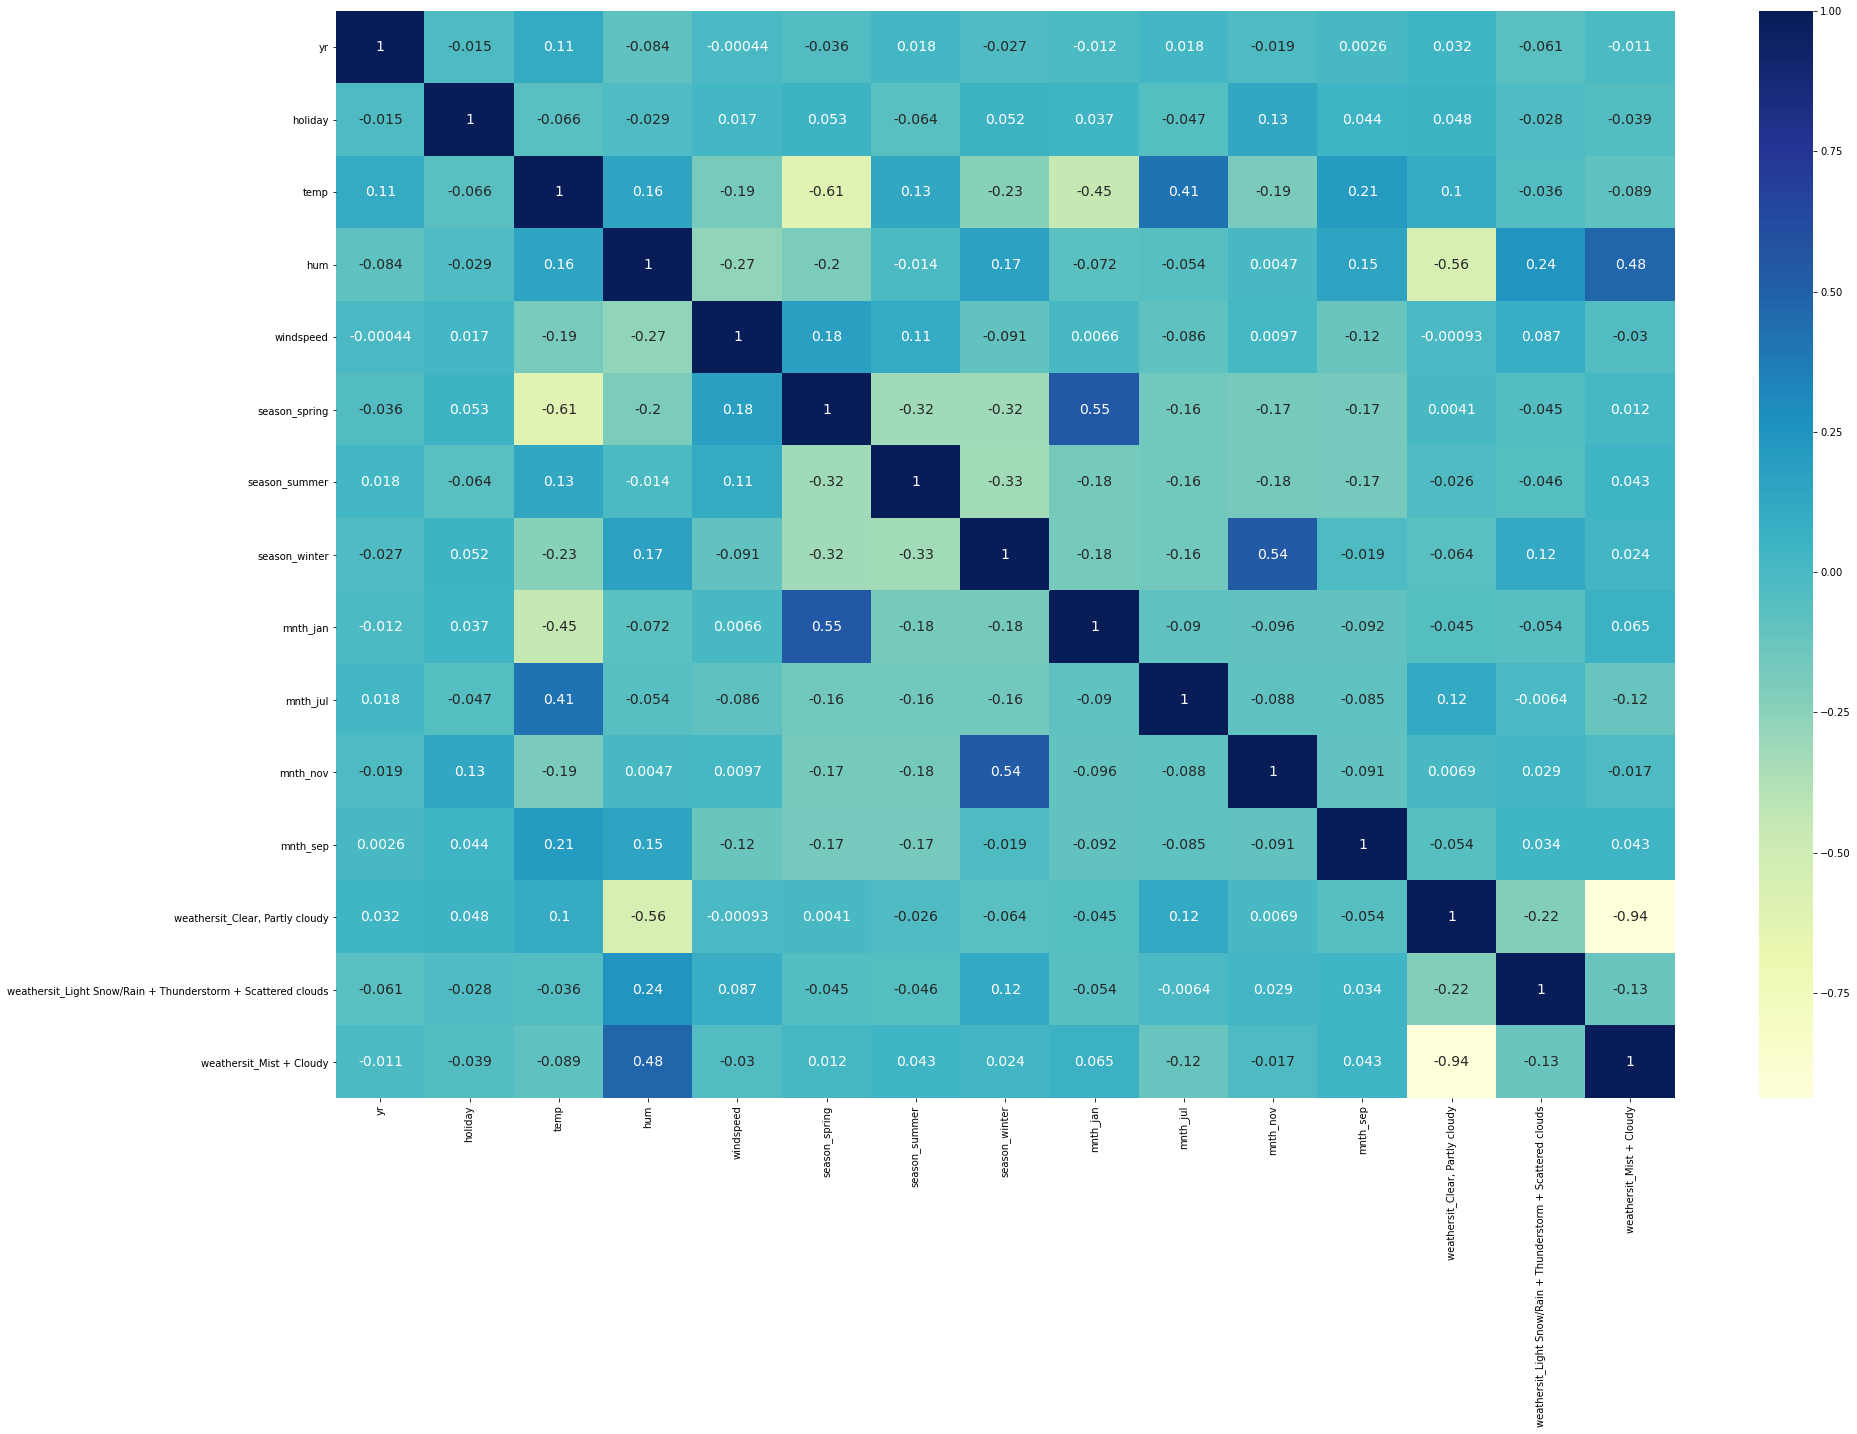

In [158]:
plt.figure(figsize = [30,20])
sns.heatmap(df_train[col].corr(), annot = True, cmap = 'YlGnBu', annot_kws={"size": 14})
plt.show()

### <b><i>Manual elimination</i></b></hr>
manually removing insignificant variables and variables with high VIF

### model 5

In [159]:
X5 = X_train[col]  # building a model using all the features selected using RFE
linear_model(X5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          4.41e-189
Time:                        12:57:17   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [160]:
VIF_calculator(X5)

                                             features    VIF
12                    weathersit_Clear, Partly cloudy  49.00
14                           weathersit_Mist + Cloudy  32.49
5                                       season_spring   5.20
13  weathersit_Light Snow/Rain + Thunderstorm + Sc...   4.16
2                                                temp   3.97
7                                       season_winter   3.76
6                                       season_summer   2.68
3                                                 hum   1.90
8                                            mnth_jan   1.57
9                                            mnth_jul   1.49
10                                           mnth_nov   1.49
11                                           mnth_sep   1.31
4                                           windspeed   1.21
0                                                  yr   1.04
1                                             holiday   1.03


* we have `mnth_nov` variable having highest p-value
* we have 3 variables namely `weathersit_Clear, Partly cloudy`, `weathersit_Mist + Cloudy` and `season_spring` which have a VIF greater then 5<hr>
Now we will first remove the variable having a high p-value as it is less significant than others,
also the VIF of other variables can decrease due to elimination of a variable

### model 6

In [161]:
X6 = X5.drop('mnth_nov', axis = 1)
linear_model(X6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          7.59e-190
Time:                        12:57:17   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [162]:
VIF_calculator(X6)

                                             features    VIF
11                    weathersit_Clear, Partly cloudy  48.01
13                           weathersit_Mist + Cloudy  31.97
5                                       season_spring   5.08
12  weathersit_Light Snow/Rain + Thunderstorm + Sc...   4.13
2                                                temp   3.89
7                                       season_winter   3.59
6                                       season_summer   2.65
3                                                 hum   1.90
8                                            mnth_jan   1.57
9                                            mnth_jul   1.49
10                                           mnth_sep   1.30
4                                           windspeed   1.21
0                                                  yr   1.04
1                                             holiday   1.02


While all other variables have a p-value of less than 0.05 `mnth_jan` has a higher p-value which is greater than 0.05<br>
So dropping `mnt_jan` variable and building a new model

### model 7

In [163]:
X7 = X6.drop('mnth_jan', axis = 1)
linear_model(X7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          2.95e-190
Time:                        12:57:17   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [164]:
VIF_calculator(X7)

                                             features    VIF
10                    weathersit_Clear, Partly cloudy  46.52
12                           weathersit_Mist + Cloudy  31.14
5                                       season_spring   5.02
11  weathersit_Light Snow/Rain + Thunderstorm + Sc...   4.08
2                                                temp   3.61
7                                       season_winter   3.48
6                                       season_summer   2.62
3                                                 hum   1.89
8                                            mnth_jul   1.48
9                                            mnth_sep   1.30
4                                           windspeed   1.19
0                                                  yr   1.03
1                                             holiday   1.02


In the above model we have all variables with p-values less than 0.05 while we have 2 variables with huge VIF scores, so dropping `weathersit_Clear, Partly cloudy` variable from the above model as it has the highest VIF

### model 8

In [165]:
X8 = X7.drop('weathersit_Clear, Partly cloudy', axis = 1)
linear_model(X8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          2.95e-190
Time:                        12:57:17   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [166]:
VIF_calculator(X8)

                                             features    VIF
3                                                 hum  28.03
2                                                temp  16.03
4                                           windspeed   4.65
5                                       season_spring   4.01
7                                       season_winter   3.33
6                                       season_summer   2.79
11                           weathersit_Mist + Cloudy   2.28
0                                                  yr   2.08
8                                            mnth_jul   1.58
9                                            mnth_sep   1.38
10  weathersit_Light Snow/Rain + Thunderstorm + Sc...   1.24
1                                             holiday   1.04


We have all variables with p-values less than 0.05 but VIF of `hum` variable is very high so dropping it

### model 9

In [167]:
X9 = X8.drop('hum', axis = 1)
linear_model(X9)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          5.06e-187
Time:                        12:57:17   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [168]:
VIF_calculator(X9)

                                             features   VIF
2                                                temp  5.09
3                                           windspeed  4.60
5                                       season_summer  2.23
4                                       season_spring  2.08
0                                                  yr  2.07
6                                       season_winter  1.78
7                                            mnth_jul  1.58
10                           weathersit_Mist + Cloudy  1.55
8                                            mnth_sep  1.34
9   weathersit_Light Snow/Rain + Thunderstorm + Sc...  1.08
1                                             holiday  1.04


plotting heatmap of above variables to understand multicollinearity

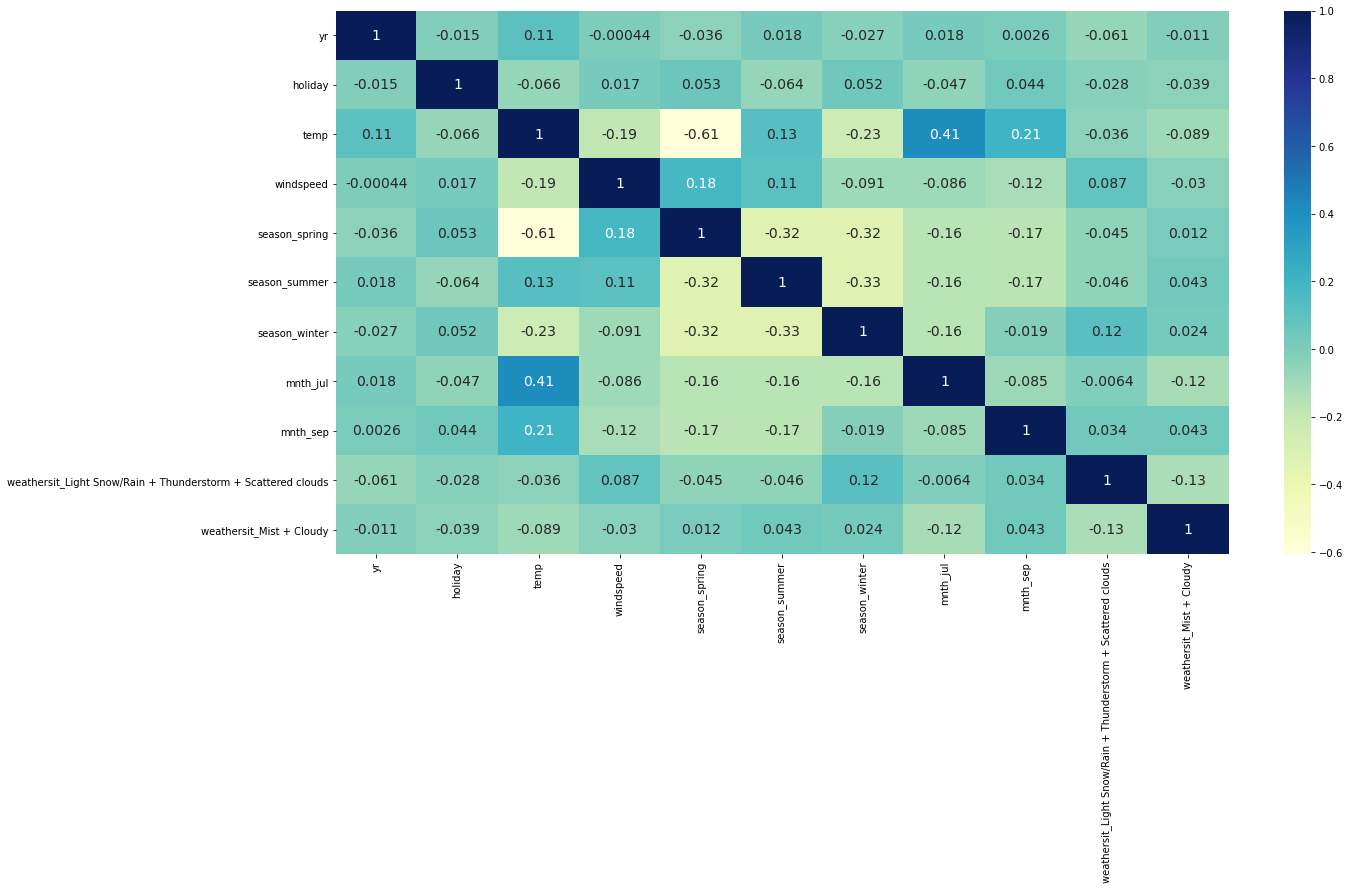

In [169]:
plt.figure(figsize = [20,10])
sns.heatmap(X9.corr(), annot = True, cmap = 'YlGnBu', annot_kws={"size": 14})
plt.show()

## Inference<hr>
* `temp` has a good positive correlation with variables `mnth_sep`, `mnth_jul`
* `temp` also has a good negative correlation with variables `season_winter` and `season_spring`
* `season_spring`, `season_winter` and `season_summer` all have a moderate negative correlation with each other

### model 9.1<hr>
building a model predicting temp variables with other variables which it is correlated to

In [170]:
y = df_train['temp'] # dependent variable
X9_1 = df_train[['mnth_sep','mnth_jul','season_winter','season_spring']] # independent variables

In [171]:
X_train_lm = sm.add_constant(X9_1)
lr = sm.OLS(y,X_train_lm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     218.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.09e-108
Time:                        12:57:19   Log-Likelihood:                 291.83
No. Observations:                 510   AIC:                            -573.7
Df Residuals:                     505   BIC:                            -552.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6556      0.010     66.825

## Inference<hr>
Even though all the variables in model 9.1 are significant it only predict about 63% variance of `temp` variable so it is not worth dropping them<br> 
Also dropping 4 variables can affect our main model hugely<hr>
So dropping `temp` variable and from model 9 and building model 10

### model 10

In [172]:
X10 = X9.drop('temp',axis = 1)
linear_model(X10)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          5.02e-149
Time:                        12:57:19   Log-Likelihood:                 406.16
No. Observations:                 510   AIC:                            -790.3
Df Residuals:                     499   BIC:                            -743.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [173]:
VIF_calculator(X10)

                                            features   VIF
2                                          windspeed  3.81
3                                      season_spring  2.07
4                                      season_summer  2.01
0                                                 yr  1.83
5                                      season_winter  1.73
9                           weathersit_Mist + Cloudy  1.52
6                                           mnth_jul  1.19
7                                           mnth_sep  1.16
8  weathersit_Light Snow/Rain + Thunderstorm + Sc...  1.08
1                                            holiday  1.04


After dropping `temp` variable the p-value of `mnth_jul` went above 0.5 which is very high<br>
so replacing `mnth_jul` variable with `temp` and building the model again

### model 11

In [174]:
X11 = X9.drop('mnth_jul', axis = 1) #using X9 df as it contains temp as well as mnth_jul variable
linear_model(X11)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.47e-186
Time:                        12:57:19   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [175]:
VIF_calculator(X11)

                                            features   VIF
3                                          windspeed  4.60
2                                               temp  3.84
0                                                 yr  2.07
4                                      season_spring  1.99
5                                      season_summer  1.90
6                                      season_winter  1.63
9                           weathersit_Mist + Cloudy  1.55
7                                           mnth_sep  1.23
8  weathersit_Light Snow/Rain + Thunderstorm + Sc...  1.08
1                                            holiday  1.04


Building a model by first dropping `windspeed` variable and then adding `hum` variable in that model as it has a moderate negative correlation

### model 12

In [176]:
X12 = X11.drop('windspeed', axis = 1)
linear_model(X12)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.33e-180
Time:                        12:57:19   Log-Likelihood:                 477.90
No. Observations:                 510   AIC:                            -935.8
Df Residuals:                     500   BIC:                            -893.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [177]:
VIF_calculator(X12)

                                            features   VIF
2                                               temp  2.89
0                                                 yr  2.06
4                                      season_summer  1.63
8                           weathersit_Mist + Cloudy  1.55
5                                      season_winter  1.43
3                                      season_spring  1.33
6                                           mnth_sep  1.23
7  weathersit_Light Snow/Rain + Thunderstorm + Sc...  1.07
1                                            holiday  1.04


###### Now  adding `hum` variable in model 12 to see if our model gets better

### model 12.1

In [178]:
col_list = list(X12.columns)
col_list.append('hum')
col_list

['yr',
 'holiday',
 'temp',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_sep',
 'weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds',
 'weathersit_Mist + Cloudy',
 'hum']

In [179]:
X12_1 = X_train[col_list]
linear_model(X12_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.2
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.53e-180
Time:                        12:57:19   Log-Likelihood:                 480.63
No. Observations:                 510   AIC:                            -939.3
Df Residuals:                     499   BIC:                            -892.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [180]:
VIF_calculator(X12_1)

                                            features    VIF
9                                                hum  27.71
2                                               temp  13.07
3                                      season_spring   3.00
5                                      season_winter   2.85
8                           weathersit_Mist + Cloudy   2.27
4                                      season_summer   2.10
0                                                 yr   2.07
6                                           mnth_sep   1.28
7  weathersit_Light Snow/Rain + Thunderstorm + Sc...   1.21
1                                            holiday   1.04


As we can see adding `hum` variable did not better our model as it has a huge VIF and also a high p-value compared to other variables in model 12_1 

### <b>Now we could add additional variables to see if it can make our model better<br>But if it dose not we can choose model 12 to be our final model as all variables in it are significant with low VIF's</b>

###### Now we could try to add some variables having a good(positive and negative) correlation to the `cnt` variable so to better our model<hr>
the variables :
        
    mnt_jun
    mnth_jul
    mnt_jan
    mnt_feb
    mnt_aug
    windspeed
have a correlation greater than +0.17  or less than -0.17

In [181]:
# adding variables mnt_aug, mnth_feb and mnth_jan to the model
col_list = list(X12.columns)   # storing all variables which are in model 12 into a variable col_list
col_list.extend(['mnth_aug','mnth_feb','mnth_jan'])  # adding the above mentioned variables to col_list
col_list

['yr',
 'holiday',
 'temp',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_sep',
 'weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds',
 'weathersit_Mist + Cloudy',
 'mnth_aug',
 'mnth_feb',
 'mnth_jan']

### model 13

In [182]:
X13 = X_train[col_list]  # building our 13th model using the variable in model 12 plus the new variables mentioned above      
linear_model(X13)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.94e-179
Time:                        12:57:19   Log-Likelihood:                 482.32
No. Observations:                 510   AIC:                            -938.6
Df Residuals:                     497   BIC:                            -883.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [183]:
VIF_calculator(X13)

                                             features   VIF
2                                                temp  4.28
3                                       season_spring  3.28
0                                                  yr  2.07
4                                       season_summer  2.07
11                                           mnth_jan  2.05
10                                           mnth_feb  1.77
9                                            mnth_aug  1.72
5                                       season_winter  1.65
8                            weathersit_Mist + Cloudy  1.59
6                                            mnth_sep  1.37
7   weathersit_Light Snow/Rain + Thunderstorm + Sc...  1.07
1                                             holiday  1.04


Dropping `mnth_feb` variable as it has the highest p-value

### model 14

In [184]:
X14 = X13.drop('mnth_feb', axis=1)
linear_model(X14)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.0
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.62e-180
Time:                        12:57:19   Log-Likelihood:                 481.95
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     498   BIC:                            -889.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [185]:
VIF_calculator(X14)

                                             features   VIF
2                                                temp  4.26
0                                                  yr  2.07
4                                       season_summer  2.07
3                                       season_spring  2.05
9                                            mnth_aug  1.71
5                                       season_winter  1.65
10                                           mnth_jan  1.60
8                            weathersit_Mist + Cloudy  1.59
6                                            mnth_sep  1.37
7   weathersit_Light Snow/Rain + Thunderstorm + Sc...  1.07
1                                             holiday  1.04


Dropping `mnth_jan` variable as it has the highest p-value

### model 15

In [186]:
X15 = X14.drop('mnth_jan', axis=1)
linear_model(X15)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.11e-180
Time:                        12:57:19   Log-Likelihood:                 480.96
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     499   BIC:                            -893.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [187]:
VIF_calculator(X15)

                                            features   VIF
2                                               temp  4.20
0                                                 yr  2.07
4                                      season_summer  2.06
9                                           mnth_aug  1.71
5                                      season_winter  1.65
8                           weathersit_Mist + Cloudy  1.58
3                                      season_spring  1.46
6                                           mnth_sep  1.37
7  weathersit_Light Snow/Rain + Thunderstorm + Sc...  1.07
1                                            holiday  1.04


###### Now if we drop `mnth_aug` we will get the same variables as we got in our model 12 which will make the new model 16 same as model 12<br>
So dropping `season_spring` variable as it has the highest p-value and checking if the new model is better than model 12

### model 16

In [188]:
X16 = X15.drop('season_spring', axis=1)
linear_model(X16)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.7
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          4.03e-181
Time:                        12:57:19   Log-Likelihood:                 479.13
No. Observations:                 510   AIC:                            -938.3
Df Residuals:                     500   BIC:                            -895.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [189]:
VIF_calculator(X16)

                                            features   VIF
2                                               temp  3.92
0                                                 yr  1.94
3                                      season_summer  1.79
8                                           mnth_aug  1.56
4                                      season_winter  1.46
7                           weathersit_Mist + Cloudy  1.45
5                                           mnth_sep  1.29
6  weathersit_Light Snow/Rain + Thunderstorm + Sc...  1.06
1                                            holiday  1.03


## Inference<hr>
###### We have all the variable having low VIF and p-value less than 0.05<br> so this could be our final model</hr>
But model 12 and model 16 have only one variable which is different <br>
So it is safe to compare them the select the best model

### Comparing model 12 and model 16 side by side

In [190]:
print(linear_model(X12), end = '\n'*5)
print(linear_model(X16))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.33e-180
Time:                        12:57:19   Log-Likelihood:                 477.90
No. Observations:                 510   AIC:                            -935.8
Df Residuals:                     500   BIC:                            -893.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [191]:
print(VIF_calculator(X12), end = '\n'*5)
print(VIF_calculator(X16))

                                            features   VIF
2                                               temp  2.89
0                                                 yr  2.06
4                                      season_summer  1.63
8                           weathersit_Mist + Cloudy  1.55
5                                      season_winter  1.43
3                                      season_spring  1.33
6                                           mnth_sep  1.23
7  weathersit_Light Snow/Rain + Thunderstorm + Sc...  1.07
1                                            holiday  1.04
None




                                            features   VIF
2                                               temp  3.92
0                                                 yr  1.94
3                                      season_summer  1.79
8                                           mnth_aug  1.56
4                                      season_winter  1.46
7                           weathersit_Mist + C

## Inference<hr>

* Both model have very close R<sup>2</sup> values which are 0.821(Model 12), 0.822(model 16)
* All the variables in both model are significant 
* Both the models have all variables having VIF's in acceptable ranges<br> But, the VIF of `temp` variable in model 16 is 3.92 where as in model 12 it is 2.89<hr>
* So as both the models have very close R<sup>2</sup> values and also have all variables significant,
we will choose <b><font color ='violet'>model 12</font></b> as our final model<br>because it has low VIF values than that in model 16

In [192]:
print(linear_model(X12), end = '\n'*5)
print(VIF_calculator(X12))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.33e-180
Time:                        12:57:19   Log-Likelihood:                 477.90
No. Observations:                 510   AIC:                            -935.8
Df Residuals:                     500   BIC:                            -893.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

## Inference<hr>

* We are able to explain <b><i>82.1%</i></b> variance of dependent variable `cnt` using our final model (model 12)
* All the variables in model 12 are significant with p-values equal to 0 or very close to 0
* All variables have VIF's in acceptable range
* All the important statistics measures R<sup>2</sup>, Adjusted-R<sup>2</sup>, F-statistic have high values which means our model predicts the dependent variable quite efficiently
* There is very less difference between values of R<sup>2</sup> and Adjusted-R<sup>2</sup> which means that there are no additional parameters which can be removed<hr>
Thus this is our final model

### Selecting model 12 as it is our final model

In [193]:
X_train_lm = sm.add_constant(X12)
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

### Extracting intercept and coefficent using sklearn library

In [194]:
lr = LinearRegression()  # instantiating a linear regression object
lr.fit(X12,y_train)   # fitting the traning data

LinearRegression()

In [195]:
print('Intercept =',round(lr.intercept_,4), end = '\n'*2)  # printing the intercept rounded up to 4 digits 
print('coefficients =', [round(i,4) for i in lr.coef_] )  # printing coefficients rounded up to 4 digits

Intercept = 0.1414

coefficients = [0.2332, -0.0991, 0.4896, -0.0648, 0.0523, 0.0957, 0.0954, -0.2998, -0.077]


###### Comparing the intercept and coefficients of all variables we can observe that they are the same 

<h2>Step 7 - <b>Residual Analysis</b></h2>

In [196]:
y_train_pred = lr_model.predict(X_train_lm)   # Making predictions using training dataset 

### Plotting actual vs predicted values for training dataset

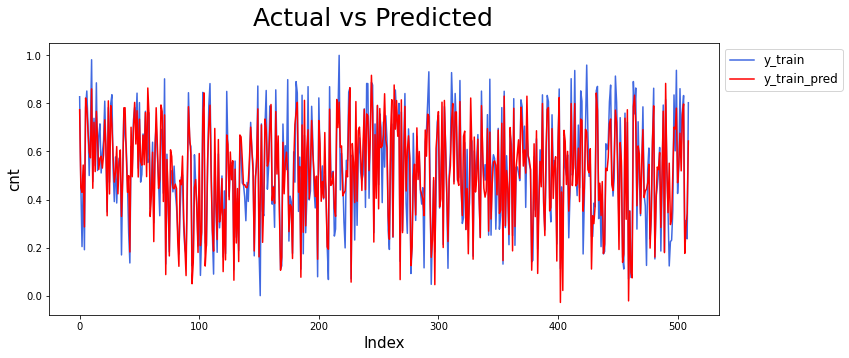

In [197]:
# Actual vs Predicted
plt.figure(figsize = [12,5])
index = [i for i in range(0,len(X_train),1)]  # ploting against index
plt.plot(index,y_train, color='royalblue', linewidth=1.5, linestyle="-") # traning data
plt.plot(index,y_train_pred, color='red', linewidth=1.5, linestyle="-")  # predicted data
plt.suptitle('Actual vs Predicted', fontsize = 25)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('cnt', fontsize = 15)
plt.legend(y_train, y_train_pred, labels = ['y_train', 'y_train_pred'], bbox_to_anchor = [1,1], fontsize = 12)   
plt.show()

## Inference<hr>
We can see that the predicted values overlap actual values quite effectively

In [198]:
residuals = y_train - y_train_pred     # storing residual values in a variable named residuals

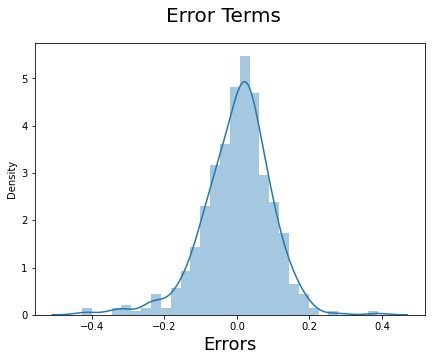

In [199]:
# plotting a distribution plot of errors of training dataset
fig = plt.figure(figsize = [7,5])
sns.distplot(residuals)
fig.suptitle('Error Terms', fontsize = 20)                  # heading 
plt.xlabel('Errors', fontsize = 18)                         # Xlabel
plt.show()

######  We can see that error terms are normally distributed with mean at 0

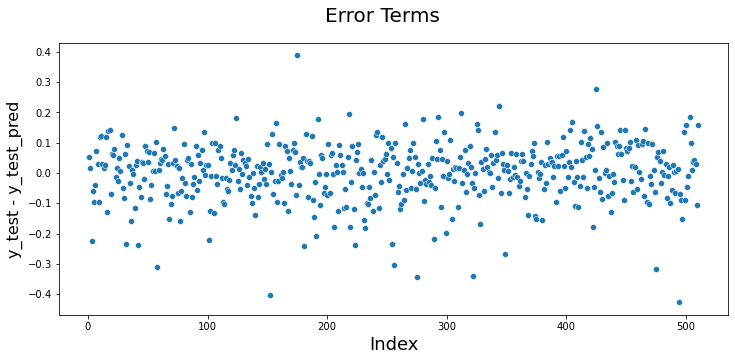

In [200]:
# plotting scatter plot of each indivisual error in training dataset
index = [i for i in range(1,511,1)]

fig = plt.figure(figsize = [12,5])
sns.scatterplot(index, y_train - y_train_pred)
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_test - y_test_pred', fontsize=16)                # Y-label
plt.show()

## Inference <hr>

###### For training error terms don't follow any pattern and are independent of each other as we can see in the above graph<br>We can see that error terms are normally distributed with mean at 0s

### Plotting residuals against y_train - Homoscedacity

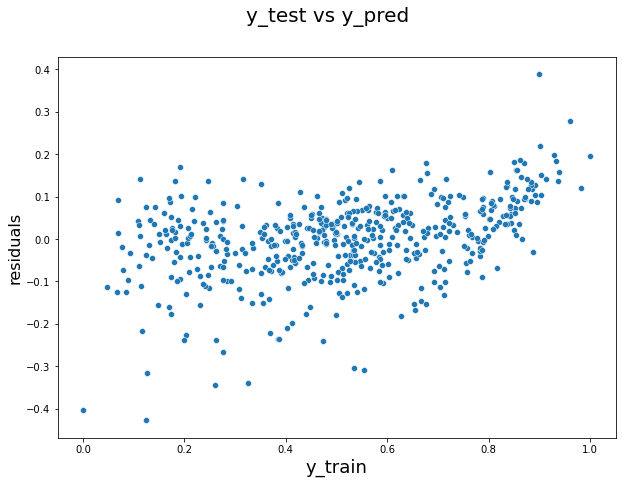

In [201]:
# checking homoscedacity
fig = plt.figure(figsize = [10,7])
sns.scatterplot(y_train, residuals)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('residuals', fontsize = 16)      
plt.show()

## Inference </hr>
###### From Above graph we can see the errors are homoscedastic i.e. they have a constant variance

<h2>Step 8 - <b>Making Predictions using final model</b></h2>

<h6 style = 'color:darkviolet'>When we scale the traning set we also have to scale the test set because the vars which the model has learned is a scaled model and the coeffs correpond to these scaled vars so the test set should also be scaled otherwise we'll get incorrect predictions</h6>

We never fit() or fit_transform() on the test data set as it is the representation of the unseen data which we havent recieved yet
So we only use transform() on the test dataset and fit() on the train data set

###### scaling the test data set using scaler.transform() method

In [202]:
# creating a list of only non-binary numeric variables variables
num_vars = list()
for i in bikesharing_df:
    if bikesharing_df[i].value_counts().count() > 2:
        num_vars.append(i) 
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [203]:
# transformimng the test data 
df_test[num_vars] = scaler.transform(df_test[num_vars])  # transforming all the non-binary vars in test dataset  

In [204]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Clear, Partly cloudy",weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds,weathersit_Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.654545,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.476601,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [205]:
y_test = df_test.pop('cnt')   # dependent test variable 
X_test = df_test.copy()      # independent test variables

In [206]:
X12.columns

Index(['yr', 'holiday', 'temp', 'season_spring', 'season_summer',
       'season_winter', 'mnth_sep',
       'weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [207]:
X_test = X_test[X12.columns]  #removing other variables from X_test and keeping only those variables which are in our final model      

In [208]:
X_test_lm = sm.add_constant(X_test)  # adding constant

In [209]:
X_test_lm.head()

,const,yr,holiday,temp,season_spring,season_summer,season_winter,mnth_sep,weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds,weathersit_Mist + Cloudy
184,1.0,0,1,0.831783,0,0,0,0,0,1
535,1.0,1,0,0.901354,0,1,0,0,0,0
299,1.0,0,0,0.511964,0,0,1,0,0,1
221,1.0,0,0,0.881625,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,1,0,0,0,0


In [210]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [211]:
# Making predictions on testing dataset
y_test_pred = lr_model.predict(X_test_lm)  

####  <b><i>Evaluating the model using r2_score method</i></b>

In [212]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8090304806579873

## Inference<hr>
We got R<sup>2</sup> value equal to 0.809 for testing dataset which is very close to the the R<sup>2</sup> value obtained in our final model which was 0.821

### Plotting y_test against residuals(of testing dataset) - Homoscedacity

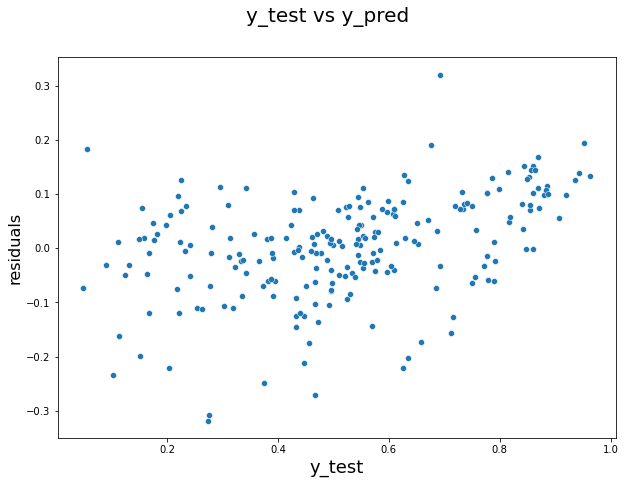

In [213]:
fig = plt.figure(figsize = [10,7])
sns.scatterplot(y_test, y_test - y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('residuals', fontsize = 16)      
plt.show()

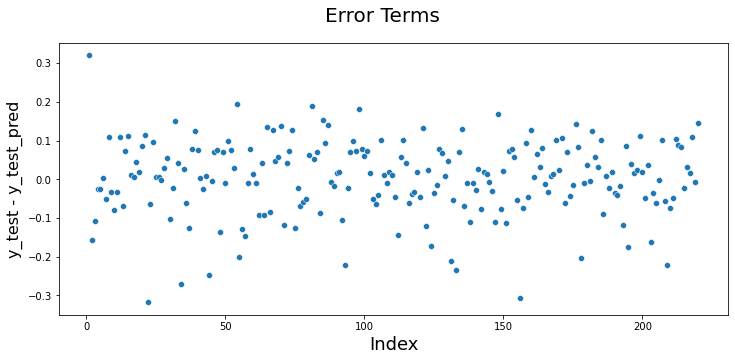

In [214]:
# visualizing distribution of error terms
index = [i for i in range(1,221,1)]

fig = plt.figure(figsize = [12,5])
sns.scatterplot(index, y_test - y_test_pred)
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_test - y_test_pred', fontsize=16)                # Y-label
plt.show()

## Inference<hr>

* From the 1st graph we can see errors for testing dataset are Homoscedastic i.e. error terms have constant variance
* From the 2nd graph we can see that distribution of errors is centered around 0 i.e. mean equal to 0 

<h2>Step 9 - <b>Model Evaluation</b></h2>

<blockquote><h3>Plotting y_test and y_test_pred to understand the spread of data</h3></blockquote>

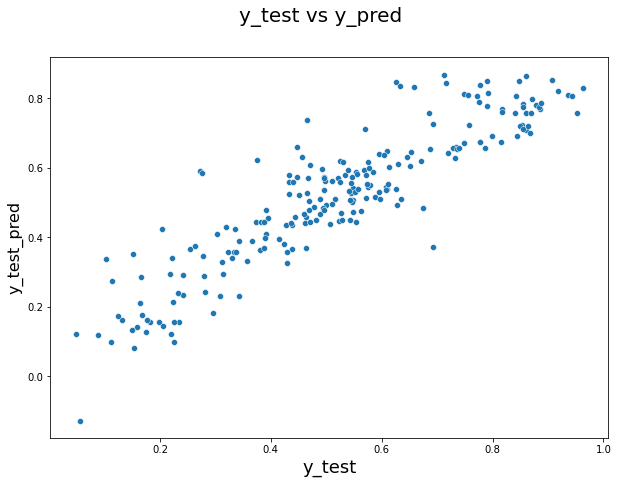

In [215]:
fig = plt.figure(figsize = [10,7])
sns.scatterplot(y_test, y_test_pred) 
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plotting heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)                      # y-label
plt.show()

<blockquote><h3>Plotting actual vs predicted values for test data</h3></blockquote>

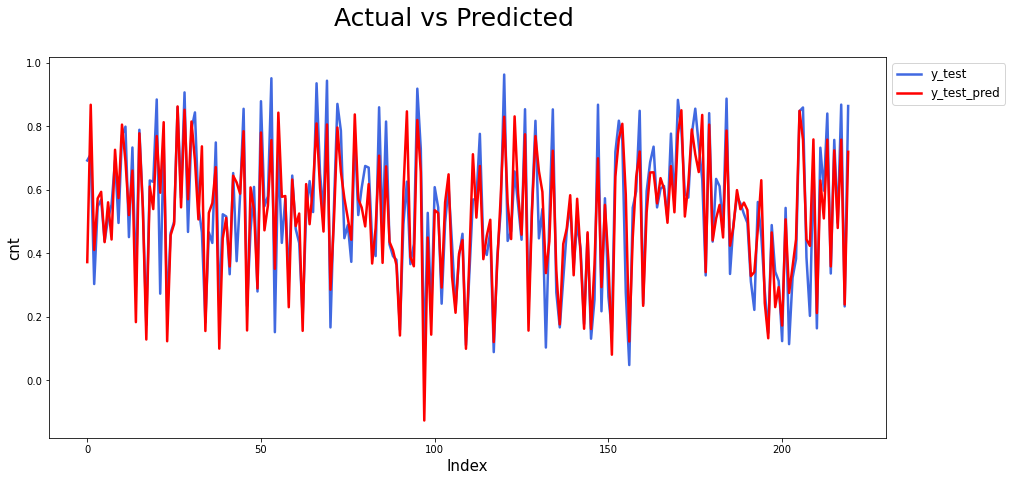

In [216]:
# Actual vs Predicted
plt.figure(figsize = [15,7])
index = [i for i in range(0,len(y_test),1)]
plt.plot(index,y_test, color='royalblue', linewidth=2.5, linestyle="-")   # plotting actual values of cnt variable            
plt.plot(index,y_test_pred, color='red', linewidth=2.5, linestyle="-")    # plotting predicted values of cnt variable
plt.suptitle('Actual vs Predicted', fontsize = 25)    # plotting heading
plt.xlabel('Index', fontsize = 15)                      # xlabel
plt.ylabel('cnt', fontsize = 15)                      # ylabel 
plt.legend(y_test, y_test_pred, labels = ['y_test', 'y_test_pred'], bbox_to_anchor = [1,1], fontsize = 12)   
plt.show()

## Inference<hr>
We can see that the variables in our final model are able to predict the dependent variable quite efficiently

In [217]:
# printing R-squared values of both training and testing dataset
print('R-squared value of final model on training dataset =','\033[1m' + f'{round(r2_score(y_true = y_train, y_pred = y_train_pred),3)}' + '\033[0m')           
print('R-squared value of final model on testing dataset =','\033[1m' + f'{round(r2_score(y_true = y_test, y_pred = y_test_pred),3)}' + '\033[0m')

R-squared value of final model on training dataset = 0.821
R-squared value of final model on testing dataset = 0.809


## Inference<hr>
We got R<sup>2</sup> value equal to 0.809 for testing dataset which is very close to the the R<sup>2</sup> value obtained in our final model which is 0.821<hr>
So we can see our model is able to explain about 81% variance of unseen test data quite efficiently

# Interpreting Results

###### We can see that the equation of our best fitted line is: <hr>
$cnt = 0.2332 \times yr -0.0991 \times holiday + 0.4896 \times temp + -0.0648 \times season\_spring + 0.0523 \times season\_summer + 0.0957 \times season\_winter + 0.0954 \times mnth\_sep -0.2998 \times (weathersit\_Light Snow/Rain + Thunderstorm + Scattered clouds) -0.077 \times (weathersit\_Mist + Cloudy)$


## <b><i>Conclusion</i></b><hr>

- The variables significant in predicting the demand for shared bikes are:
    
      - yr
      - holiday
      - temp
      - season_spring
      - season_summer
      - season_winter
      - mnth_sep
      - weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds
      - weathersit_Mist + Cloudy
    

* Company should focus on expanding the business during months of august and september as these months see the highest demand for shared bikes<br><br>
* The demand for shared bikes is high in summer and winter season compared to spring season<br><br>
* The demand for shared bikes drops a bit when there is Mist and the weather is cloudy<br><br>
* The demand drops drastically when the weather is bad i.e.when there is Light Snow/Rain and Thunderstorm and Scattered clouds<br><br>
* Compared to 2018 company did better in 2019 and the business is expedted to increase once ongoing quarantine situation ends across the nation<br><br>
* When there is a holiday, the demand drops a bit<br><br>
* There is a high correlation between demand and temperature so increase in temperature would generally see an increase in demand<br> i.e there is more demand of shared bikes on a hot clear sunny day that that on a cold and cloudy day

## <b><i>Recommendations and Suggestions</i></b><hr>

* As there is an increase in demand in months of august and september company could come up with offers and discounts to boost their demand <br><br>
* Due to less demand on days with bad weather or very cold temperatures company could focus on servicing and maintainance of bikes on such days<br><br>
* Company could try to tweak the prices of shared bikes (maybe decrease a little bit) in spring season(where there is less demand) so to increse the demand and maximize the profits